In [1]:
# General
import sys
import numpy as np
from pickle import load, dump
sys.path.insert(0, '..')
# Notakto
import util
from visual import GameWithConfidences
from environment import Env
from agents.random_agent import RandomAgent
from agents.human import Human
import agents.qtree as qtree
import statistics

Name		Goal4x4_7
Iteration	480
Architecture	[17, 700, 500, 400, 300, 200, 17]
Activation	Relu Hidden


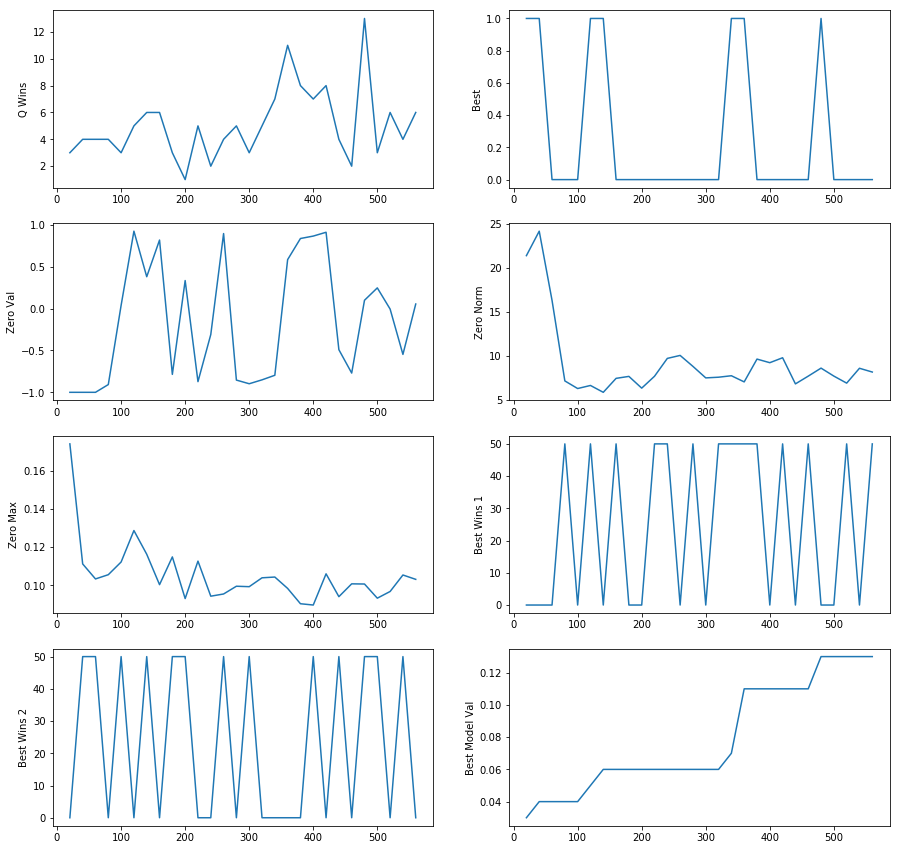

In [11]:
# Load the desired agent
version = 7
PATH = "agents/saves/goal_4x4_{}_best.npz".format(version)
STATS_PATH = "agents/saves/Goal4x4_{}".format(version)
AGENT_PLAYER = 2
agent = util.load_agent(PATH, qtree.QTree)
# Output the description of given agent
print("Name\t\t{}\nIteration\t{}\nArchitecture\t{}\nActivation\t{} {}".format(
    agent.name, agent.iteration, agent.layers, agent.activation_func_name.title(), agent.activation_type.title()))
# Create game setting
env = Env(agent.size)
r = RandomAgent(env)
h = Human()
agent.mode("q")
# Get statistics
stats = statistics.group_stats_by_type(statistics.get_stats(STATS_PATH))
# Display stats
desired = ["q_wins", "best", "zero_val", "zero_norm", "zero_max", "best_wins_1", "best_wins_2", "best_model_val"]
statistics.plot_value(stats, desired, fig_size = (15, 15), best_fit = False)

In [12]:
# Run a visual game against a random opponent
players = [agent, r]
GameWithConfidences(env, players[AGENT_PLAYER - 1], players[2 - AGENT_PLAYER], show_confidences = True)

SystemExit: 

C:\Users\abeol\Anaconda3\envs\Deep-Notakto\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Run a visual game against a human
players = [agent, h]
GameWithConfidences(env, players[AGENT_PLAYER - 1], players[2 - AGENT_PLAYER], show_confidences = True)

In [3]:
# Convert old save to new API
# Load the file
PATH = "agents/saves/goal_4x4_6_best.npz"
with open(PATH, "rb") as f:
    old = load(f)
# Change the save dictionary
del old["gamma"]
# Save the converted file
with open(PATH, "wb") as f:
    dump(old, f)

In [ ]:
stats.keys()